## Importing the libraries

In [ ]:
!pip install xgboost

In [ ]:
!pip install joblib

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV
import joblib





In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Load and Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Churn.csv')

## EDA

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## Data Preprocessing

In [ ]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
data1=data.copy()

In [ ]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data['Geography']=data['Geography'].map({'France':1, 'Spain':2, 'Germany':3})
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
x=data.iloc[:,:10]
y=data['Exited']

## Strorytelling - Visualization

In [ ]:
print(data.CreditScore.mean(),data.CreditScore.max(),data.CreditScore.min())

650.5288 850 350


In [ ]:
print(data.Age.mean(),data.Age.max(),data.Age.min())

38.9218 92 18


In [ ]:
print(data.NumOfProducts.mean(),data.NumOfProducts.max(),data.NumOfProducts.min())

1.5302 4 1


In [ ]:
print(data.EstimatedSalary.mean(),data.EstimatedSalary.max(),data.EstimatedSalary.min())

100090.239881 199992.48 11.58


In [ ]:
data.Exited.value_counts()/100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

In [ ]:
print('so most of the customers(about 80 percent) do not leave the bank')

so most of the customers(about 80 percent) do not leave the bank


most of the cutomers are men


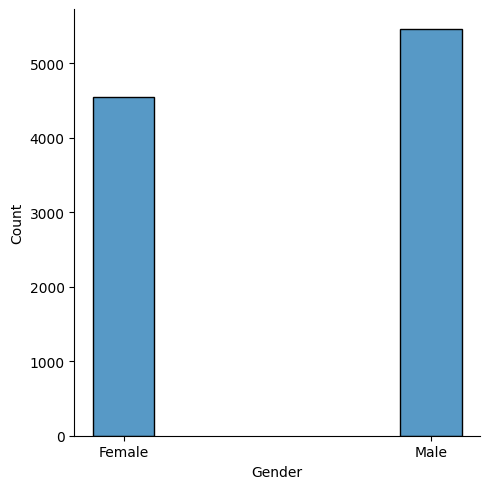

In [ ]:
sns.displot(data1,x='Gender',shrink=0.2)
print('most of the cutomers are men')

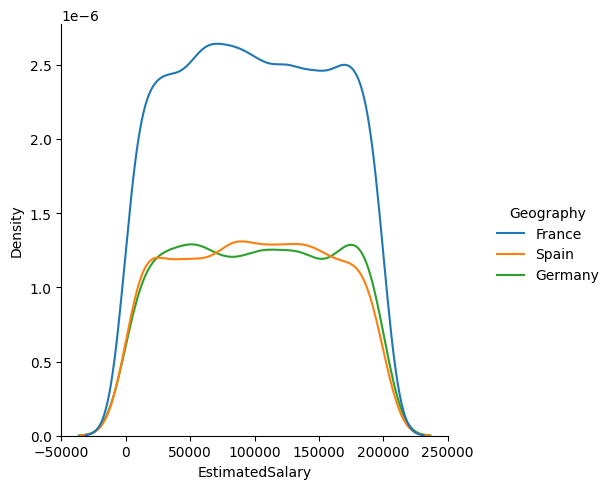

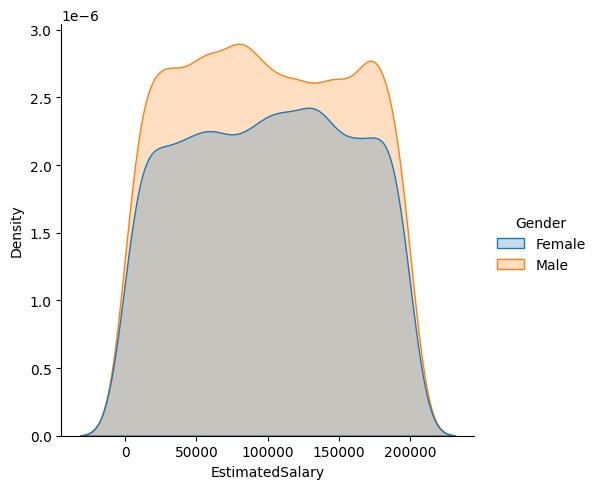

In [ ]:
sns.displot(data1,x='EstimatedSalary',kind='kde',hue='Geography')
sns.displot(data1,x='EstimatedSalary',kind='kde',hue='Gender',fill=True)

In [ ]:
pd.crosstab(data1.HasCrCard,data1.IsActiveMember,normalize=True)*100

IsActiveMember,0,1
HasCrCard,,
0,14.01,15.44
1,34.48,36.07


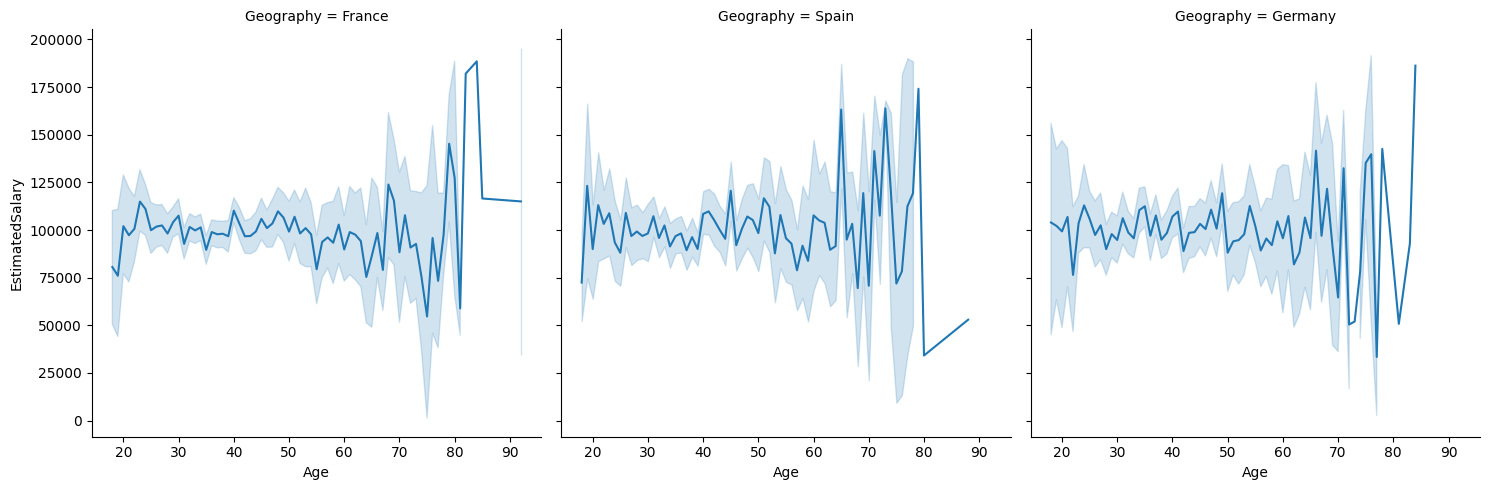

In [ ]:
sns.relplot(x="Age", y="EstimatedSalary",col='Geography',kind='line', data=data1)

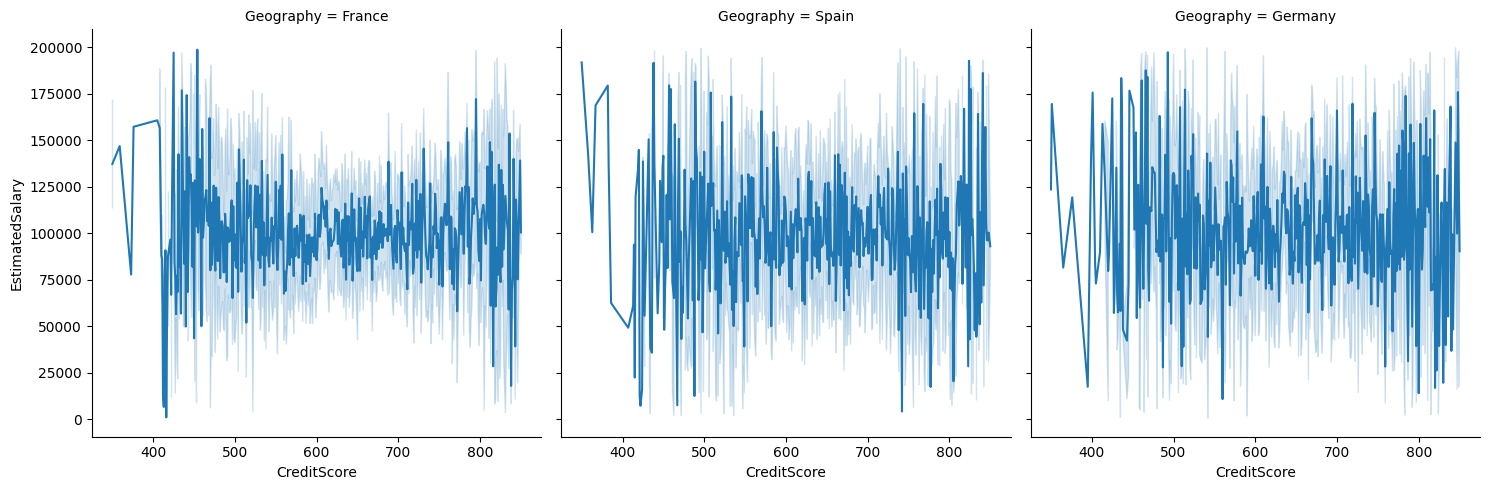

In [ ]:
sns.relplot(x="CreditScore", y="EstimatedSalary",col='Geography',kind='line', data=data1)

## Prepare Data for Machine learning

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=85 )


In [ ]:

ss=StandardScaler()
train=ss.fit_transform(x_train)
test=ss.transform(x_test)

## Train your model

In [ ]:
print('First GaussianNB algorithm to test')

nb = GaussianNB()
nb.fit(train, y_train)

y_nb_train = nb.predict(train)
y_nb_test = nb.predict(test)

# Compute recall
r_nb_train = recall_score(y_train, y_nb_train, pos_label=1)  # Assuming positive class is 1
r_nb_test = recall_score(y_test, y_nb_test, pos_label=1)    # Assuming positive class is 1

# Compute confusion matrix
cm_nb_train = confusion_matrix(y_train, y_nb_train)
cm_nb_test = confusion_matrix(y_test, y_nb_test)

print('Result for train =')
print('Confusion Matrix:\n', cm_nb_train)
print('Recall:', r_nb_train)
print('Result for test =')
print('Confusion Matrix:\n', cm_nb_test)
print('Recall:', r_nb_test)


First GaussianNB algorithm to test
Result for train =
Confusion Matrix:
 [[6190  206]
 [1145  459]]
Recall: 0.28615960099750626
Result for test =
Confusion Matrix:
 [[1514   53]
 [ 300  133]]
Recall: 0.3071593533487298


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=85)

print('Here are the results for the Decision Tree algorithm. It is likely overfitted.')

# Fit the model
dt.fit(train, y_train)

# Predict on both training and testing data
y_dt_train = dt.predict(train)
y_dt_test = dt.predict(test)

# Compute recall
r_dt_train = recall_score(y_train, y_dt_train, pos_label=1)  # Assuming positive class is 1
r_dt_test = recall_score(y_test, y_dt_test, pos_label=1)    # Assuming positive class is 1

# Compute confusion matrix
cm_dt_train = confusion_matrix(y_train, y_dt_train)
cm_dt_test = confusion_matrix(y_test, y_dt_test)

# Compute accuracy
a_dt_train = accuracy_score(y_train, y_dt_train)
a_dt_test = accuracy_score(y_test, y_dt_test)

print('Result for train =')
print('Confusion Matrix:\n', cm_dt_train)
print('Recall:', r_dt_train)
print('Accuracy:', a_dt_train)

print('Result for test =')
print('Confusion Matrix:\n', cm_dt_test)
print('Recall:', r_dt_test)
print('Accuracy:', a_dt_test)


Here are the results for the Decision Tree algorithm. It is likely overfitted.
Result for train =
Confusion Matrix:
 [[6396    0]
 [   0 1604]]
Recall: 1.0
Accuracy: 1.0
Result for test =
Confusion Matrix:
 [[1342  225]
 [ 213  220]]
Recall: 0.5080831408775982
Accuracy: 0.781


In [ ]:
print('This is the result for Logistic Regression')

# Initialize and fit the model
lr = LogisticRegression()
lr.fit(train, y_train)

# Predict on both training and testing data
y_lr_train = lr.predict(train)
y_lr_test = lr.predict(test)

# Compute recall
r_lr_train = recall_score(y_train, y_lr_train, pos_label=1)  # Assuming positive class is 1
r_lr_test = recall_score(y_test, y_lr_test, pos_label=1)    # Assuming positive class is 1

# Compute confusion matrix
cm_lr_train = confusion_matrix(y_train, y_lr_train)
cm_lr_test = confusion_matrix(y_test, y_lr_test)

# Compute accuracy
a_lr_train = accuracy_score(y_train, y_lr_train)
a_lr_test = accuracy_score(y_test, y_lr_test)

print('Result for train =')
print('Confusion Matrix:\n', cm_lr_train)
print('Recall:', r_lr_train)
print('Accuracy:', a_lr_train)

print('Result for test =')
print('Confusion Matrix:\n', cm_lr_test)
print('Recall:', r_lr_test)
print('Accuracy:', a_lr_test)

This is the result for Logistic Regression
Result for train =
Confusion Matrix:
 [[6189  207]
 [1272  332]]
Recall: 0.20698254364089774
Accuracy: 0.815125
Result for test =
Confusion Matrix:
 [[1512   55]
 [ 348   85]]
Recall: 0.19630484988452657
Accuracy: 0.7985


In [ ]:
# Define the parameter grid for KNN
knn_p = {
    'n_neighbors': list(range(1, 26)),  # 1 to 25 neighbors
    'weights': ['uniform', 'distance']  # Uniform or distance-based weights
}

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with recall as the scoring metric
gs_knn = GridSearchCV(
    estimator=knn,
    param_grid=knn_p,
    scoring='recall',  # Optimize for recall
    cv=10,             # 10-fold cross-validation
    n_jobs=-1          # Use all available processors
)

# Fit GridSearchCV to the training data
gs_knn.fit(train, y_train)

# Retrieve the best recall score and corresponding hyperparameters
best_recall = gs_knn.best_score_  # Best recall score
best_parameters = gs_knn.best_params_

print("Best Recall Score: {:.2f}".format(best_recall))  # Print best recall score
print("Best Parameters:", best_parameters)             # Print best hyperparameters


Best Recall Score: 0.45
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
# Initialize KNeighborsClassifier with specific parameters
knn2 = KNeighborsClassifier(n_neighbors=6, weights='distance')

# Fit the model to the training data
knn2.fit(train, y_train)

# Predict on both training and testing data
y_knn_train = knn2.predict(train)
y_knn_test = knn2.predict(test)

# Compute confusion matrices
cm_knn_train = confusion_matrix(y_train, y_knn_train)
cm_knn_test = confusion_matrix(y_test, y_knn_test)


# Compute recall
r_knn_train = recall_score(y_train, y_knn_train, pos_label=1)  # Adjust pos_label if needed
r_knn_test = recall_score(y_test, y_knn_test, pos_label=1)


print('Here are the results. It is evident that the model may be overfitted due to the perfect trainingrecall.')

print('Result for train =')
print('Confusion Matrix:\n', cm_knn_train)
print('Recall:', r_knn_train)


print('Result for test =')
print('Confusion Matrix:\n', cm_knn_test)
print('Recall:', r_knn_test)



Here are the results. It is evident that the model may be overfitted due to the perfect trainingrecall.
Result for train =
Confusion Matrix:
 [[6396    0]
 [   0 1604]]
Recall: 1.0
Result for test =
Confusion Matrix:
 [[1487   80]
 [ 239  194]]
Recall: 0.44803695150115475


In [ ]:
# Define the parameter grid for GridSearchCV
svc_p = [
    {'C': [0.1, 0.5, 0.9], 'kernel': ['linear']},
    {'C': [0.1, 0.5, 0.9], 'kernel': ['rbf'], 'gamma': [0.1, 0.5, 0.9]},
    {'C': [0.1, 0.5, 0.9], 'kernel': ['poly'], 'degree': [1, 2, 3]},
    {'kernel': ['sigmoid']}  # No 'C' or 'gamma' for sigmoid kernel
]

print('Here we need to do grid search to find the best parameters for SVC optimized for recall')

# Initialize the SVC model without specifying the kernel
svc = SVC()

# Initialize GridSearchCV with recall as the scoring metric
gs_svc = GridSearchCV(
    estimator=svc,
    param_grid=svc_p,
    scoring='recall',  # Use recall as scoring metric
    cv=10,             # 10-fold cross-validation
    n_jobs=-1          # Use all available processors
)

# Fit GridSearchCV to the training data
gs_svc.fit(train, y_train)

# Retrieve the best score and parameters
best_recall = gs_svc.best_score_  # Best recall score
best_parameters = gs_svc.best_params_

print("Best Recall Score: {:.2f}".format(best_recall))  # Print best recall score
print("Best Parameters:", best_parameters)              # Print best hyperparameters


Here we need to do grid search to find the best parameters for SVC optimized for recall
Best Recall Score: 0.37
Best Parameters: {'C': 0.9, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Initialize SVC with the best parameters found
svc2 = SVC(kernel='rbf', gamma=0.1, C=0.9)

# Fit the model to the training data
svc2.fit(train, y_train)

# Predict on both training and testing data
y_svc_train = svc2.predict(train)
y_svc_test = svc2.predict(test)

# Compute confusion matrices
cm_svc_train = confusion_matrix(y_train, y_svc_train)
cm_svc_test = confusion_matrix(y_test, y_svc_test)

# Compute recall
r_svc_train = recall_score(y_train, y_svc_train, pos_label=1)  # Adjust pos_label if needed
r_svc_test = recall_score(y_test, y_svc_test, pos_label=1)

# Print results
print('Result for train:')
print('Confusion Matrix:\n', cm_svc_train)
print('Recall:', r_svc_train)

print('Result for test:')
print('Confusion Matrix:\n', cm_svc_test)
print('Recall:', r_svc_test)

Result for train:
Confusion Matrix:
 [[6288  108]
 [ 986  618]]
Recall: 0.385286783042394
Result for test:
Confusion Matrix:
 [[1528   39]
 [ 250  183]]
Recall: 0.4226327944572748


In [ ]:
# Define the parameter grid for GridSearchCV
rfc_p = [
    {'criterion': ['gini', 'entropy', 'log_loss'],
     'max_depth': [1, 3, 5],
     'min_samples_split': [2, 5],
     'min_samples_leaf': [1, 2, 5],
     'max_features': ['sqrt', 'log2', None]}
]

print('Here we need to do grid search to find the best parameters for RandomForestClassifier optimized for recall')

# Initialize RandomForestClassifier
rfc1 = RandomForestClassifier(random_state=85)

# Initialize GridSearchCV with recall as the scoring metric
gs_rfc1 = GridSearchCV(
    estimator=rfc1,
    param_grid=rfc_p,
    scoring='recall',  # Use recall as scoring metric
    cv=10,             # 10-fold cross-validation
    n_jobs=-1          # Use all available processors
)

# Fit GridSearchCV to the training data
gs_rfc1.fit(train, y_train)

# Retrieve the best recall score and corresponding hyperparameters
best_recall = gs_rfc1.best_score_  # Best recall score
best_parameters = gs_rfc1.best_params_

print("Best Recall Score: {:.2f}".format(best_recall))  # Print best recall score
print("Best Parameters:", best_parameters)              # Print best hyperparameters


Here we need to do grid search to find the best parameters for RandomForestClassifier optimized for recall
Best Recall Score: 0.42
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
# Initialize RandomForestClassifier with the selected parameters
rcf = RandomForestClassifier(
    criterion='entropy',
    max_depth=5,
    max_features=None,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=85
)

# Fit the model to the training data
rcf.fit(train, y_train)

# Predict on both training and testing data
y_rcf_train = rcf.predict(train)
y_rcf_test = rcf.predict(test)

# Compute confusion matrices
cm_rcf_train = confusion_matrix(y_train, y_rcf_train)
cm_rcf_test = confusion_matrix(y_test, y_rcf_test)

# Compute recall
r_rcf_train = recall_score(y_train, y_rcf_train, pos_label=1)  # Adjust pos_label if needed
r_rcf_test = recall_score(y_test, y_rcf_test, pos_label=1)

# Print results
print('Result for train:')
print('Confusion Matrix:\n', cm_rcf_train)
print('Recall:', r_rcf_train)

print('Result for test:')
print('Confusion Matrix:\n', cm_rcf_test)
print('Recall:', r_rcf_test)


Result for train:
Confusion Matrix:
 [[6201  195]
 [ 924  680]]
Recall: 0.4239401496259352
Result for test:
Confusion Matrix:
 [[1509   58]
 [ 236  197]]
Recall: 0.45496535796766746


In [ ]:
# Define the parameter grid for RandomizedSearchCV
xgb_p = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.5, 0.7, 0.9],
    'max_depth': [4, 6, 8],
    'gamma': [0, 0.3, 0.6],
    'colsample_bytree': [0.4, 0.6, 0.8],
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [1, 2, 5]
}

print('Performing randomized search to find the best parameters for XGBoost Classifier optimized for recall.')

# Initialize XGBClassifier
xgb = XGBClassifier(random_state=85)

# Initialize RandomizedSearchCV with recall as the scoring metric
rs_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_p,
    n_iter=20,            # Number of random samples
    scoring='recall',     # Use recall as scoring metric
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # Use all available processors
    random_state=85       # Seed for reproducibility
)

# Fit RandomizedSearchCV to the training data
rs_xgb.fit(train, y_train)

# Retrieve the best recall score and corresponding hyperparameters
best_recall = rs_xgb.best_score_  # Best recall score
best_parameters = rs_xgb.best_params_

print("Best Recall Score: {:.2f}".format(best_recall))  # Print best recall score
print("Best Parameters:", best_parameters)              # Print best hyperparameters


Performing randomized search to find the best parameters for XGBoost Classifier optimized for recall.
Best Recall Score: 0.86
Best Parameters: {'subsample': 0.5, 'scale_pos_weight': 5, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
print('here we have xgboost algorithm')

xgb = XGBClassifier( subsample= 0.5, scale_pos_weight=5, n_estimators= 50, min_child_weight=5, max_depth=6, learning_rate = 0.01, gamma = 0, colsample_bytree = 0.8)
xgb.fit(train, y_train)

y_xgb_train = xgb.predict(train)
y_xgb_test = xgb.predict(test)

cm_xgb_train=confusion_matrix(y_train,y_xgb_train)
cm_xgb_test=confusion_matrix(y_test,y_xgb_test)


r_xgb_train=recall_score(y_train,y_xgb_train)
r_xgb_test=recall_score(y_test,y_xgb_test)



print('recall Score of training with  xgboost classifier =',r_xgb_train)
print(f'recall Score of test with  xgboost classifier= {r_xgb_test} \n' )

print('result for train =')
print(cm_xgb_train,'       ',r_xgb_train)
print('result for test =')
print(cm_xgb_test,'       ',r_xgb_test)

here we have xgboost algorithm
recall Score of training with  xgboost classifier = 0.8884039900249376
recall Score of test with  xgboost classifier= 0.8706697459584296 

result for train =
[[4361 2035]
 [ 179 1425]]         0.8884039900249376
result for test =
[[1039  528]
 [  56  377]]         0.8706697459584296


In [ ]:
# Define custom recall metric for Keras
def recall_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    true_positives = tf.reduce_sum(y_true * y_pred)
    possible_positives = tf.reduce_sum(y_true)
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

# Define ANN model
def build_model(learning_rate=0.001):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=6, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))  # Adding dropout
    model.add(tf.keras.layers.Dense(units=6, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[recall_metric])
    return model

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Fit the model
ann = build_model(learning_rate=0.001)
history = ann.fit(train, y_train, batch_size=36, epochs=100, class_weight=class_weights, verbose=1)

# Predict with ANN model
y_ann_train_prob = ann.predict(train)
y_ann_test_prob = ann.predict(test)

# Convert probabilities to binary outcomes
y_ann_train = (y_ann_train_prob > 0.5).astype(int)
y_ann_test = (y_ann_test_prob > 0.5).astype(int)

# Flatten arrays for recall_score
y_ann_train = y_ann_train.flatten()
y_ann_test = y_ann_test.flatten()

# Compute recall
r_ann_train = recall_score(y_train, y_ann_train, pos_label=1)
r_ann_test = recall_score(y_test, y_ann_test, pos_label=1)

# Print recall scores
print('Recall Score of training with ANN =', r_ann_train)
print(f'Recall Score of test with ANN = {r_ann_test}')


Epoch 1/100
223/223 [==============================] - 4s 6ms/step - loss: 0.6841 - recall_metric: 0.4506
Epoch 2/100
223/223 [==============================] - 2s 7ms/step - loss: 0.6628 - recall_metric: 0.4537
Epoch 3/100
223/223 [==============================] - 1s 6ms/step - loss: 0.6586 - recall_metric: 0.4182
Epoch 4/100
223/223 [==============================] - 2s 8ms/step - loss: 0.6475 - recall_metric: 0.4387
Epoch 5/100
223/223 [==============================] - 3s 13ms/step - loss: 0.6363 - recall_metric: 0.4850
Epoch 6/100
223/223 [==============================] - 2s 10ms/step - loss: 0.6320 - recall_metric: 0.4816
Epoch 7/100
223/223 [==============================] - 3s 12ms/step - loss: 0.6217 - recall_metric: 0.4978
Epoch 8/100
223/223 [==============================] - 1s 5ms/step - loss: 0.6260 - recall_metric: 0.4959
Epoch 9/100
223/223 [==============================] - 1s 6ms/step - loss: 0.6141 - recall_metric: 0.5177
Epoch 10/100
223/223 [=====================

## Test the model and show the metrics

In [ ]:
print(' Recall of training with Logistic Regression =', recall_score(y_train, y_lr_train, pos_label=1))
print(f' Recall of test with Logistic Regression = {recall_score(y_test, y_lr_test, pos_label=1)} \n' )

print(' Recall of training with XGBoost =', recall_score(y_train, y_xgb_train, pos_label=1))
print(f' Recall of test with XGBoost = {recall_score(y_test, y_xgb_test, pos_label=1)} \n' )

print(' Recall of training with SVC =', recall_score(y_train, y_svc_train, pos_label=1))
print(f' Recall of test with SVC = {recall_score(y_test, y_svc_test, pos_label=1)} \n' )

print(' Recall of training with Random Forest =', recall_score(y_train, y_rcf_train, pos_label=1))
print(f' Recall of test with Random Forest = {recall_score(y_test, y_rcf_test, pos_label=1)} \n' )

print(' Recall of training with Decision Tree =', recall_score(y_train, y_dt_train, pos_label=1))
print(f' Recall of test with Decision Tree = {recall_score(y_test, y_dt_test, pos_label=1)} \n' )

print(' Recall of training with GaussianNB =', recall_score(y_train, y_nb_train, pos_label=1))
print(f' Recall of test with GaussianNB = {recall_score(y_test, y_nb_test, pos_label=1)} \n' )

print(' Recall of training with KNeighbors =', recall_score(y_train, y_knn_train, pos_label=1))
print(f' Recall of test with KNeighbors = {recall_score(y_test, y_knn_test, pos_label=1)} \n' )

print(' Recall of training with ANN =', recall_score(y_train, y_ann_train, pos_label=1))
print(f' Recall of test with ANN = {recall_score(y_test, y_ann_test, pos_label=1)} \n' )

print('The XGBoost classifier is the best algorithm for this data because it has the best recall score and accuracy.')


 Recall of training with Logistic Regression = 0.20698254364089774
 Recall of test with Logistic Regression = 0.19630484988452657 

 Recall of training with XGBoost = 0.8884039900249376
 Recall of test with XGBoost = 0.8706697459584296 

 Recall of training with SVC = 0.385286783042394
 Recall of test with SVC = 0.4226327944572748 

 Recall of training with Random Forest = 0.4239401496259352
 Recall of test with Random Forest = 0.45496535796766746 

 Recall of training with Decision Tree = 1.0
 Recall of test with Decision Tree = 0.5080831408775982 

 Recall of training with GaussianNB = 0.28615960099750626
 Recall of test with GaussianNB = 0.3071593533487298 

 Recall of training with KNeighbors = 1.0
 Recall of test with KNeighbors = 0.44803695150115475 

 Recall of training with ANN = 0.7044887780548629
 Recall of test with ANN = 0.7482678983833718 

The XGBoost classifier is the best algorithm for this data because it has the best recall score and accuracy.


In [ ]:
xgb

<module 'xgboost' from '/usr/local/lib/python3.10/dist-packages/xgboost/__init__.py'>

## Save  final model

In [ ]:
joblib.dump(xgb, '/content/drive/MyDrive/xgb_model.pkl')

print("Model saved to Google Drive")


joblib.dump(ss, '/content/drive/MyDrive/ss.pkl')

print("Scaler saved to Google Drive")

Model saved to Google Drive
Scaler saved to Google Drive
